In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

%matplotlib inline

df = pd.read_csv('Global_Superstore.csv')

In [17]:
# Initial data exploration
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,11/11/2014,11/13/2014,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/2014,2/7/2014,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/2014,10/18/2014,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/2014,1/30/2014,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/2014,11/6/2014,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical


In [19]:
#Data exploration continued
df.info()
df.describe()

# Initial insights:
# Data is fairly clean, minimal cleaning needed
# Concerns around consistency of profit across transactions
# Discount or shipping cost may be affecting profit - to explore
# Profit may vary by region or product - to explore

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          1000 non-null   int64  
 1   Order ID        1000 non-null   object 
 2   Order Date      1000 non-null   object 
 3   Ship Date       1000 non-null   object 
 4   Ship Mode       1000 non-null   object 
 5   Customer ID     1000 non-null   object 
 6   Customer Name   1000 non-null   object 
 7   Segment         1000 non-null   object 
 8   Postal Code     194 non-null    float64
 9   City            1000 non-null   object 
 10  State           1000 non-null   object 
 11  Country         1000 non-null   object 
 12  Region          1000 non-null   object 
 13  Market          1000 non-null   object 
 14  Product ID      1000 non-null   object 
 15  Category        1000 non-null   object 
 16  Sub-Category    1000 non-null   object 
 17  Product Name    1000 non-null   ob

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,1000.000000,194.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,25079.328000,53966.170103,1710.971470,5.55800,0.092840,288.920440,272.384897
std,12897.726632,33734.306466,1259.239238,2.71846,0.148666,574.504782,176.160716
min,58.000000,2920.000000,1.910000,1.00000,0.000000,-3059.820000,1.070000
25%,15118.750000,19134.000000,826.907500,4.00000,0.000000,10.037500,209.827500
50%,25084.500000,60564.000000,1585.115000,5.00000,0.000000,190.685000,258.897500
75%,34524.000000,88187.500000,2477.812500,7.00000,0.150000,518.872500,351.070250
max,51284.000000,98198.000000,9892.740000,14.00000,0.800000,4946.370000,923.630000


In [21]:
#Data cleaning - converting to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

Total Sales: 1710971.47
Mean Sales: 1710.97
Total Profit: 288920.44
Mean Profit: 288.92
Mean Shipping Cost: 272.38
Mean Quantity Ordered: 5.56
Mean Discount: 0.09
Correlation Between Profit and Sales: 0.53
Correlation Between Profit and Discount: -0.51
Correlation Between Profit and Shipping Cost: 0.29
Correlation Between Profit and Quantity: 0.15


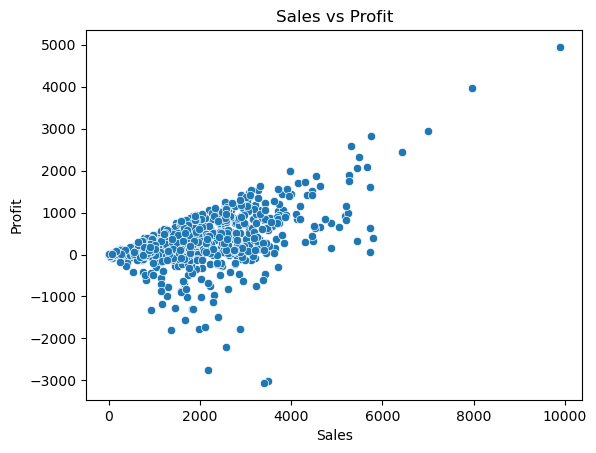

In [99]:
#Initial data analysis
total_sales = df['Sales'].sum()
print(f"Total Sales: {total_sales:.2f}")

mean_sales = df['Sales'].mean()
print(f"Mean Sales: {mean_sales:.2f}")

total_profit = df['Profit'].sum()
print(f"Total Profit: {total_profit:.2f}")

mean_profit = df['Profit'].mean()
print(f"Mean Profit: {mean_profit:.2f}")

mean_shipping_cost = df['Shipping Cost'].mean()
print(f"Mean Shipping Cost: {mean_shipping_cost:.2f}")

mean_quantity = df['Quantity'].mean()
print(f"Mean Quantity Ordered: {mean_quantity:.2f}")

mean_discount = df['Discount'].mean()
print(f"Mean Discount: {mean_discount:.2f}")

profit_sales_correlation = df['Profit'].corr(df['Sales'])
print(f"Correlation Between Profit and Sales: {profit_sales_correlation:.2f}")

profit_discount_correlation = df['Profit'].corr(df['Discount'])
print(f"Correlation Between Profit and Discount: {profit_discount_correlation:.2f}")

profit_shipping_correlation = df['Profit'].corr(df['Shipping Cost'])
print(f"Correlation Between Profit and Shipping Cost: {profit_shipping_correlation:.2f}")

profit_quantity_correlation = df['Profit'].corr(df['Quantity'])
print(f"Correlation Between Profit and Quantity: {profit_quantity_correlation:.2f}")

sns.scatterplot(x='Sales', y='Profit', data=df)
plt.title('Sales vs Profit')
plt.show()

#A large number of transactions appear to be contributing negatively to profit
#There appears to be a negative relationship between profit and discount

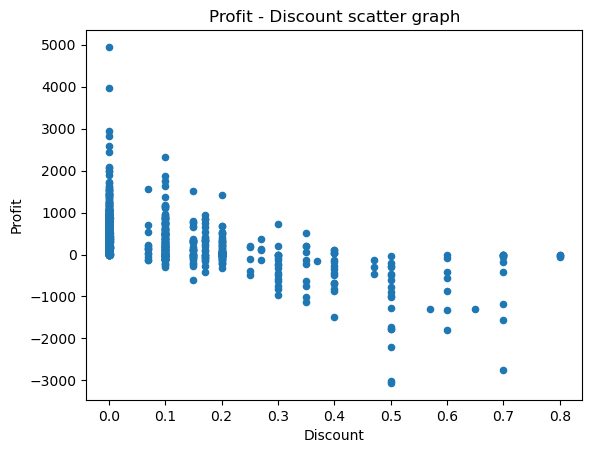

Correlation between profit and discount: -0.51, P-value: 0.00 


Correlation between profit and discount with potential outliers removed: -0.53, P-value: 0.00


Proportion of discounted transactions that led to negative profit (%): 39.77
Proportion of total transactions that led to negative profit (%): 17.50


Correlation between average discount and number of transactions: 0.07, P-value: 0.04


In [97]:
#Further investigation into relationship between profit and discount

#Visulise relationship

df.plot(kind='scatter', x='Discount', y='Profit')
plt.title('Profit - Discount scatter graph')
plt.show()

#Check p-value to ensure statistically significant result

corr, p_value, = pearsonr(df['Profit'], df['Discount'])
print(f"Correlation between profit and discount: {corr:.2f}, P-value: {p_value:.2f} \n\n")

#Check correlation remains with potential outliers removed

z_scores = zscore(df[['Profit', 'Discount']])
outliers = (z_scores<=3).all(axis=1)

df_outliers_removed = df[outliers]

corr, p_value, = pearsonr(df_outliers_removed['Profit'], df_outliers_removed['Discount'])
print(f"Correlation between profit and discount with potential outliers removed: {corr:.2f}, P-value: {p_value:.2f}")

#Check proportion of discounted transactions led to a loss

with_discount = df[(df['Discount'] > 0)]
negative_profit_with_discount = df[(df['Discount'] > 0) & (df['Profit'] < 0)]
num_transactions_with_discount = len(with_discount)
num_transactions_with_discount_and_negative_profit = len(negative_profit_with_discount)
proportion = num_transactions_with_discount_and_negative_profit / num_transactions_with_discount * 100

negative_profit = df[(df['Profit'] < 0)]
num_transactions_with_negative_profit = len(negative_profit)
num_transactions = len(df)
proportion_total = num_transactions_with_negative_profit / num_transactions * 100

print(f"\n\nProportion of discounted transactions that led to negative profit (%): {proportion:.2f}")
print(f"Proportion of total transactions that led to negative profit (%): {proportion_total:.2f}")

#Check the effects discounts may be having on the number of transactions made by customers

transactions_summary = df.groupby('Customer ID').agg(
    Transactions=('Customer ID', 'count'),
    Avg_Discount=('Discount', 'mean')
)

corr_transactions, p_value_transactions, = pearsonr(transactions_summary['Transactions'], transactions_summary['Avg_Discount'])
print(f"\n\nCorrelation between average discount and number of transactions: {corr_transactions:.2f}, P-value: {p_value_transactions:.2f}")

#The discounts Global Mart are offering are leading to lower profits and in many cases costing the company

                       Sales    Profit  Shipping  Discount  Profit Margin (%)
Region                                                                       
Central US          17187.94   5676.02     25.61      0.22              33.02
Central Africa      33810.48   9668.22    354.39      0.00              28.60
North Africa        26266.44   7416.42    326.86      0.00              28.24
Eastern Europe      45662.19  12228.45    336.31      0.00              26.78
Eastern Africa      17387.94   4302.72    386.96      0.00              24.75
Canada                887.01    213.72     15.75      0.00              24.09
Northern Europe    103888.63  23552.73    313.14      0.06              22.67
Southern Africa     22262.28   4876.32    325.57      0.00              21.90
Southern Europe     94441.11  20557.50    315.24      0.07              21.77
Eastern US          12256.44   2544.89     21.75      0.14              20.76
Eastern Asia       193590.60  37911.16    332.49      0.04      

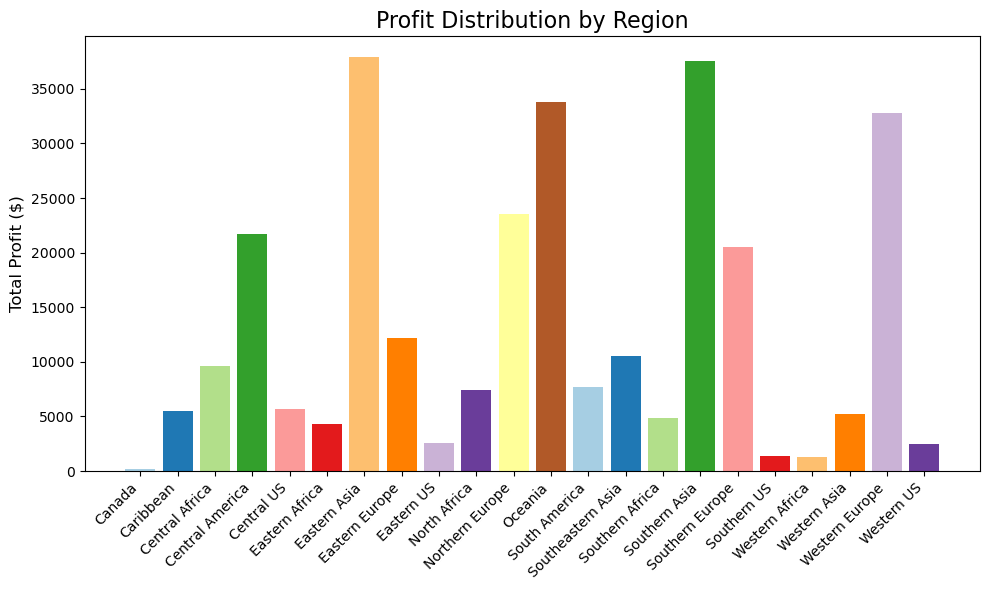

In [187]:
#Regional analysis

region_table = df.groupby('Region')

region_analysis = region_table.agg(
    Sales = ('Sales', 'sum'),
    Profit = ('Profit', 'sum'),
    Shipping = ('Shipping Cost', 'mean'),
    Discount = ('Discount', 'mean')
)

region_analysis['Profit Margin (%)'] = (region_analysis['Profit'] / region_analysis['Sales']) * 100

region_analysis['Profit Margin (%)'] = (region_analysis['Profit'] / region_analysis['Sales']) * 100

region_analysis = region_analysis.round(2)

region_analysis_sorted = region_analysis.sort_values(by='Profit Margin (%)', ascending=False)

print(region_analysis_sorted)

corr_region_discount, p_value_region_discount, = pearsonr(region_analysis['Profit Margin (%)'], region_analysis['Discount'])
print(f"\n\nCorrelation between Discount and Profit Margin: {corr_region_discount:.2f}, P-value: {p_value_region_discount:.2f} \n\n")

corr_region_shipping, p_value_region_shipping, = pearsonr(region_analysis['Profit Margin (%)'], region_analysis['Shipping'])
print(f"Correlation between Shipping Cost and Profit Margin: {corr_region_shipping:.2f}, P-value: {p_value_region_shipping:.2f}")

# Produce a bar chart showing profit distribution across regions
profit_data = region_analysis['Profit']
regions = sales_data.index

plt.figure(figsize=(10, 6))
bars = plt.bar(regions, profit_data, color=plt.cm.Paired.colors[:len(profit_data)])

plt.title('Profit Distribution by Region', fontsize=16)
plt.ylabel('Total Profit ($)', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()

#Consistent with previous findings that discounts are contributing to lower profits
#Countries with highest profit margins not being fully exploited

Most Profitable Products: 

 Product Name
Motorola Smart Phone, Full Size                             13088.28
Hoover Stove, Red                                           10288.61
Cisco Smart Phone, Full Size                                 9662.99
Cisco Smart Phone, with Caller ID                            6607.40
Nokia Smart Phone, Full Size                                 5765.12
Harbour Creations Executive Leather Armchair, Adjustable     5552.68
Sauder Classic Bookcase, Traditional                         5285.30
Nokia Smart Phone, Cordless                                  5131.13
GBC Ibimaster 500 Manual ProClick Binding System             4946.37
Safco Classic Bookcase, Metal                                4904.94
Name: Profit, dtype: float64 


Least Profitable Products: 

 Product Name
Lesro Wood Table, Adjustable Height         -953.44
Hon Round Table, with Bottom Storage       -1021.67
HP Wireless Fax, Laser                     -1037.74
Barricks Round Table, Adjustable Heig

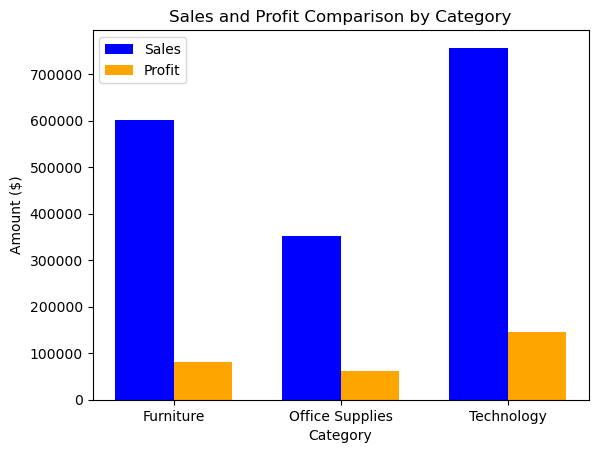

Sub-Category analysis:
                   Sales    Profit  Difference  Profit Margin (%)
Sub-Category                                                    
Phones        417939.31  75119.47   342819.84          17.973775
Appliances    289711.30  48518.99   241192.31          16.747358
Bookcases     240688.73  45483.14   195205.59          18.897079
Copiers       231104.67  52315.19   178789.48          22.637011
Tables        179292.88  13051.69   166241.19           7.279536
Chairs        179648.44  23245.88   156402.56          12.939650
Machines       71366.87   8992.06    62374.81          12.599768
Storage        37592.32   4490.04    33102.28          11.944035
Accessories    36572.17   8641.96    27930.21          23.629880
Binders        19751.19   7435.09    12316.10          37.643757
Supplies        2037.92    -89.85     2127.77          -4.408907
Furnishings     1862.26    408.24     1454.02          21.921751
Paper           1816.57    806.32     1010.25          44.386949
A

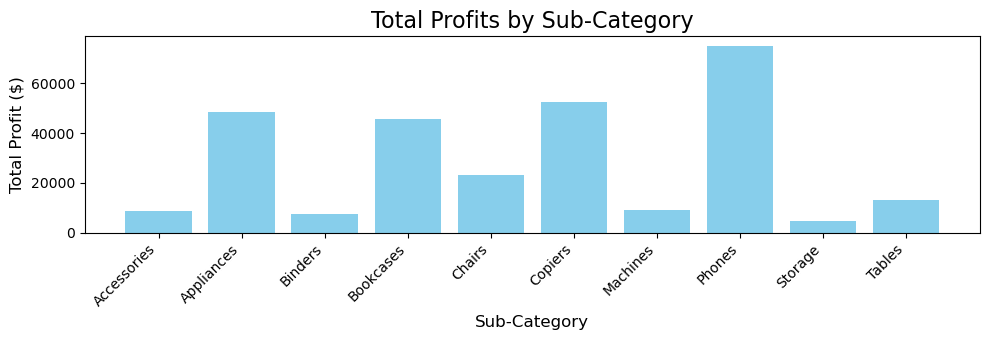

In [173]:
#Product and category analysis

#Top products

top_products = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)
print("Most Profitable Products: \n\n", top_products, "\n\n")

bottom_products = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).tail(10)
print("Least Profitable Products: \n\n", bottom_products, "\n\n")

products_less_than_100 = df[(df['Profit']<100)]
num_products_less_than_100 = len(products_less_than_100)
print("Number of products contributing less than $100 in profit: ", num_products_less_than_100, "\n\n")

#Category analysis

category_table = df.groupby('Category')

category_analysis = category_table.agg(
    Sales = ('Sales', 'sum'),
    Profit = ('Profit', 'sum'),
)

category_analysis['Profit Margin (%)'] = (category_analysis['Profit'] / category_analysis['Sales']) * 100

print("Category analysis:\n", category_analysis, "\n\n")

#Bar chart showing sales and profit by category

x = np.arange(len(category_analysis))
width = 0.35

fig, ax = plt.subplots()
bar1 = ax.bar(x - width/2, category_analysis['Sales'], width, label='Sales', color='blue')
bar2 = ax.bar(x + width/2, category_analysis['Profit'], width, label='Profit', color='orange')

ax.set_xlabel('Category')
ax.set_ylabel('Amount ($)')
ax.set_title('Sales and Profit Comparison by Category')
ax.set_xticks(x)
ax.set_xticklabels(category_analysis.index)
ax.legend()
plt.show()

#Sub-category analysis

sub_category_table = df.groupby('Sub-Category')

sub_category_analysis = sub_category_table.agg(
    Sales = ('Sales', 'sum'),
    Profit = ('Profit', 'sum'),
)

sub_category_analysis['Difference'] = (sub_category_analysis['Sales'] - sub_category_analysis['Profit'])

sub_category_analysis['Profit Margin (%)'] = (sub_category_analysis['Profit'] / sub_category_analysis['Sales']) * 100

sub_category_analysis_sorted = sub_category_analysis.sort_values(by='Difference', ascending=False)

print("Sub-Category analysis:\n", sub_category_analysis_sorted)

#Bar chart showing profit by sub-category

exclude_sub_categories = ['art', 'envelopes', 'fasteners', 'furnishings', 'labels', 'paper', 'supplies']
sub_category_profit = df.groupby('Sub-Category')['Profit'].sum()
sub_category_profit = sub_category_profit[~sub_category_profit.index.str.lower().isin([cat.lower() for cat in exclude_sub_categories])]

plt.figure(figsize=(10, 3.5))
bars = plt.bar(sub_category_profit.index, sub_category_profit, color='skyblue')

plt.ylim(bottom=0)

plt.title('Total Profits by Sub-Category', fontsize=16)
plt.xlabel('Sub-Category', fontsize=12)
plt.ylabel('Total Profit ($)', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

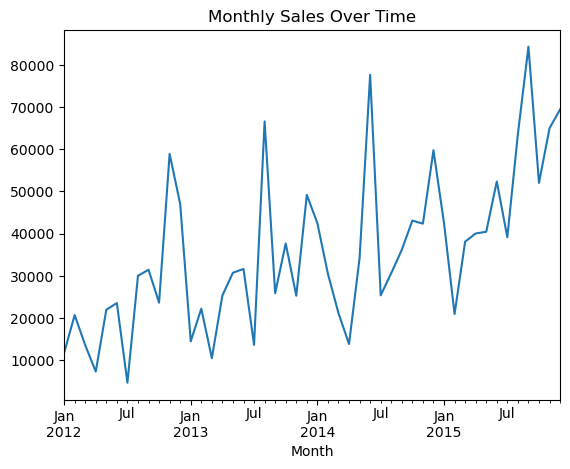

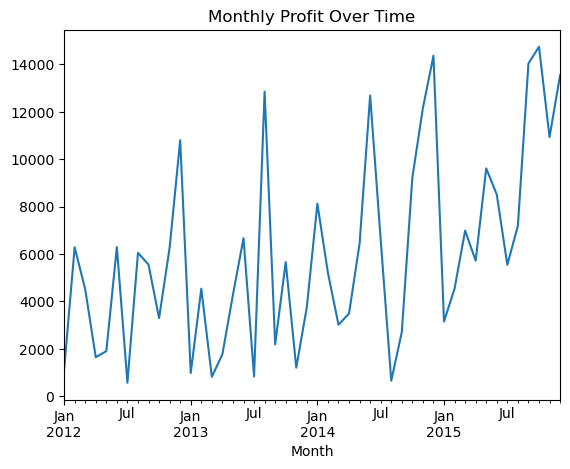

In [111]:
#Sales analysis over time

df['Month'] = df['Order Date'].dt.to_period('M')

monthly_sales = df.groupby('Month')['Sales'].sum()

monthly_sales.index = monthly_sales.index.to_timestamp()

monthly_sales.plot(kind='line')
plt.title('Monthly Sales Over Time')
plt.show()

#Profit analysis over time

monthly_profit = df.groupby('Month')['Profit'].sum()

monthly_profit.index = monthly_profit.index.to_timestamp()

monthly_profit.plot(kind='line')
plt.title('Profit Over Time')
plt.show()

#Trend is upward but with significant fluctations

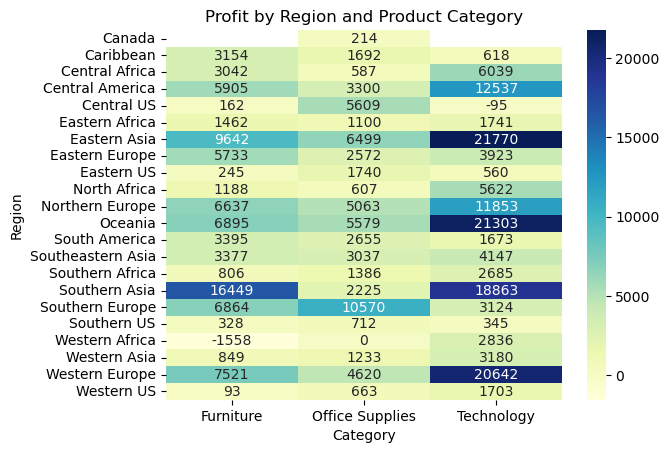

In [189]:
#Heatmap showing profit by region and product category to see if any further insights are to be gained

pivot_table = df.pivot_table(values='Profit', index='Region', columns='Category', aggfunc='sum')
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Profit by Region and Product Category')
plt.show()